In [2]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

data = pd.read_csv('../datasets/kc_house_data.csv')

In [5]:
# 1.0 Crie uma nova coluna chamada 'dormitory_type'
# 	* 1.1 se o valor da coluna 'bedrooms' for igual a 1 -> studio 
# 	* 1.2 se o valor da coluna 'bedrooms' for igual a 2 -> apartament 
# 	* 1.3 se o valor da coluna 'bedrooms' > 2 -> house
data['dormitory_type'] = 'undefined'
data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'

Text(0.5, 1.0, 'GRÁFICO 1')

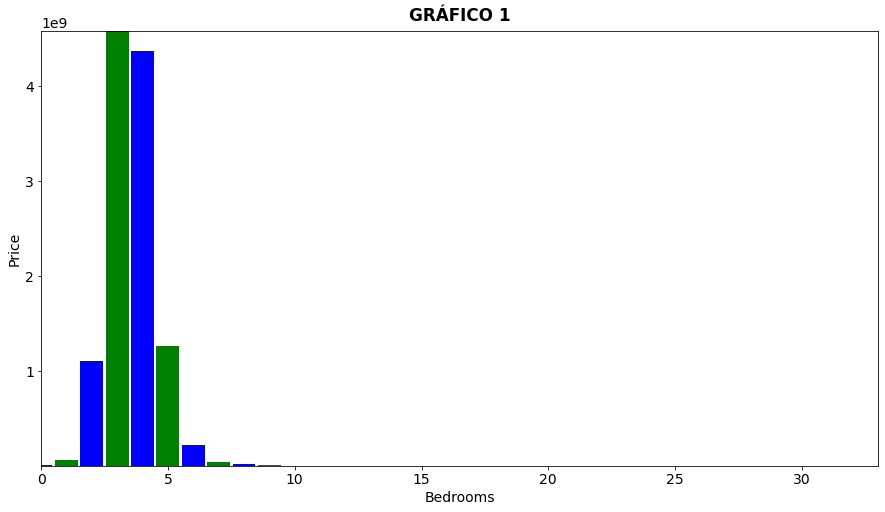

In [91]:
# 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos
by_price_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure( figsize=(15,8) )
plt.bar(by_price_bedrooms['bedrooms'], by_price_bedrooms['price'], color= ['blue', 'green'], width= 0.9,)
plt.ylabel('Price')
plt.xlabel('Bedrooms')

plt.xlim(group_price['bedrooms'].min(), 
         group_price['bedrooms'].max())
plt.ylim(group_price['price'].min(), 
         group_price['price'].max())

plt.title('GRÁFICO 1', loc='center', pad=10, fontweight='bold')

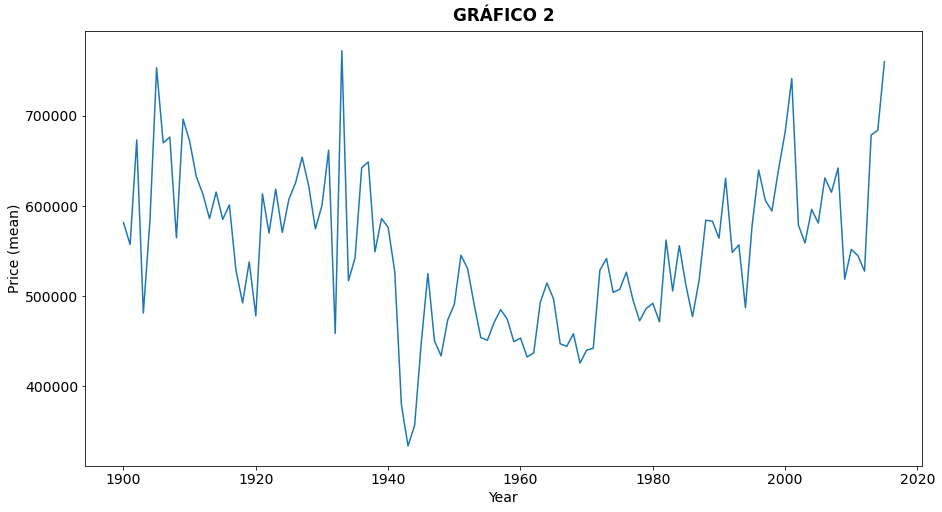

In [90]:
# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano da construção dos imóveis
by_price_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

plt.figure( figsize=(15,8))
plt.rcParams['font.size'] = '14' #Change Font Size Globally
plt.title('GRÁFICO 2', loc='center', pad=10, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price (mean)')
plt.plot( by_price_year['yr_built'], by_price_year['price'])

<BarContainer object of 4 artists>

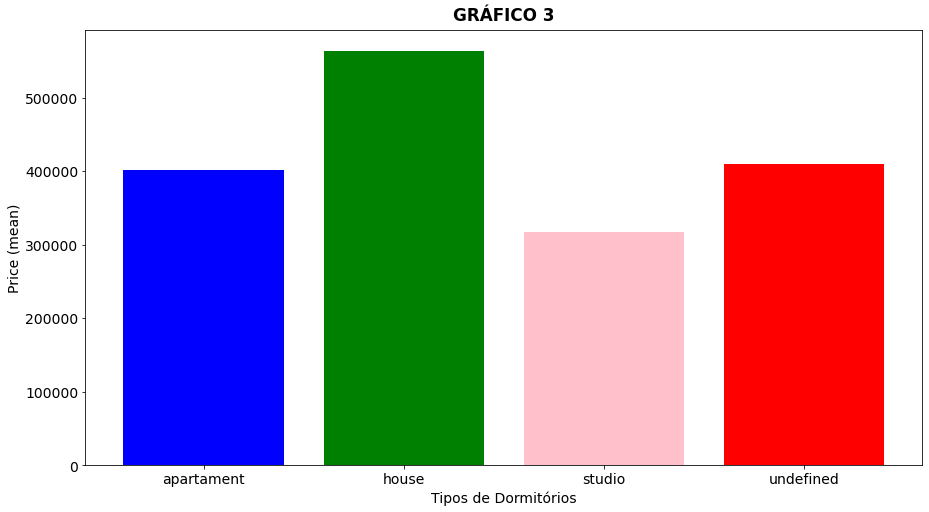

In [126]:
# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios
by_price_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

plt.figure( figsize=(15,8))

plt.title('GRÁFICO 3', loc='center', pad=10, fontweight='bold')
plt.xlabel('Dormitory_type')
plt.ylabel('Price (mean)')
plt.bar( by_price_dormitory['dormitory_type'],
         by_price_dormitory['price'], 
         color= ['blue', 'green', 'pink', 'red'])


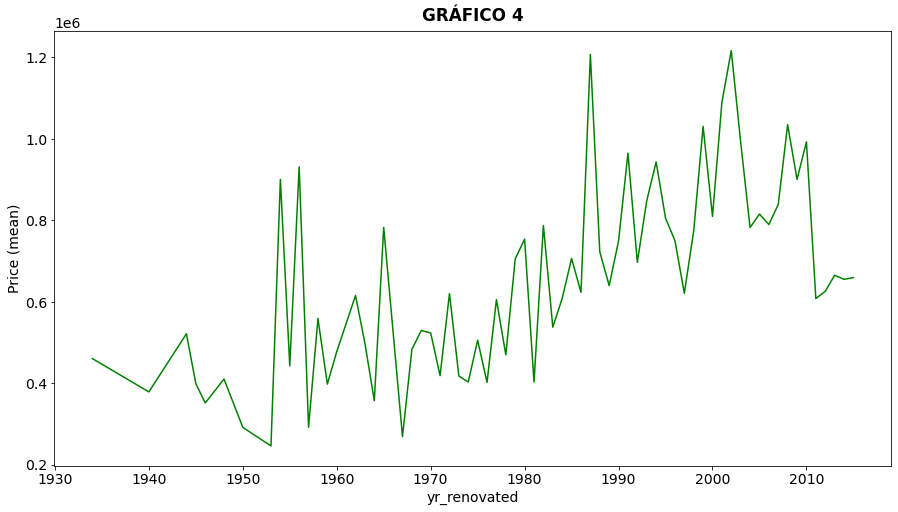

In [138]:
# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930
from_1930 = data.loc[data['yr_renovated'] >= 1930]
from_1930 = from_1930[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

plt.figure( figsize=(15,8))

plt.title('GRÁFICO 4', loc='center', pad=10, fontweight='bold')
plt.xlabel('yr_renovated')
plt.ylabel('Price (mean)')
plt.plot( from_1930['yr_renovated'], from_1930['price'], color = 'green')

In [145]:
# 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis
data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17
...,...,...,...
309,2014,house,692687.72
310,2014,studio,516500.00
311,2015,apartament,543250.00
312,2015,house,797383.06


<BarContainer object of 4 artists>

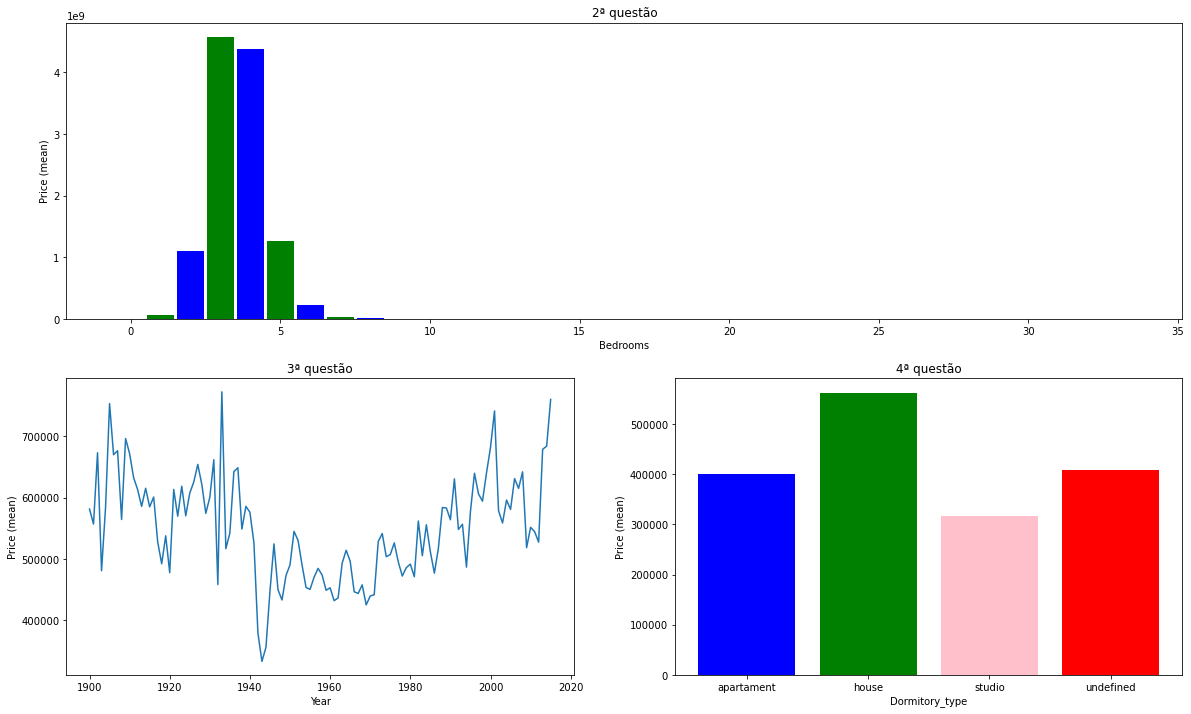

In [22]:
# 7. Crie um Dashboard com os gráficos das questões 02,03,04 (1 linha e 2 colunas)

from matplotlib import gridspec

fig = plt.figure( figsize=(20, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] , title='2ª questão', ylabel = 'Price (mean)', xlabel='Bedrooms') # First Row
ax2 = fig.add_subplot( specs[1, 0] , title='3ª questão', ylabel = 'Price (mean)', xlabel='Year') # Second Rows - First Column
ax3 = fig.add_subplot( specs[1, 1] , title='4ª questão', ylabel = 'Price (mean)', xlabel='Dormitory_type') # Second Rows - Second Column

# Graph 1
by_price_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_price_bedrooms['bedrooms'], 
        by_price_bedrooms['price'], 
        color= ['blue', 'green'], 
        width= 0.9,)


# Graph 2
by_price_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot( by_price_year['yr_built'], by_price_year['price'])


# Graph 3
by_price_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar( by_price_dormitory['dormitory_type'],
         by_price_dormitory['price'], 
         color= ['blue', 'green', 'pink', 'red'])

<BarContainer object of 4 artists>

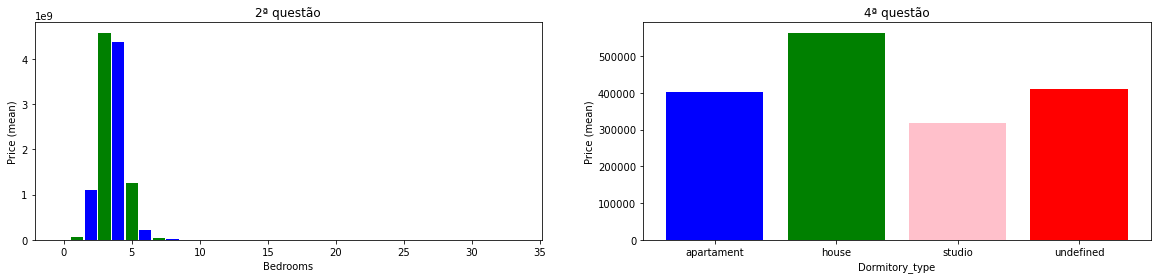

In [31]:
#8. Crie um Dashboard com os gráficos das questões 02 e 04 (2 colunas)
from matplotlib import gridspec

fig = plt.figure( figsize=(20, 4) )
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot( specs[0, 0], title='2ª questão', ylabel = 'Price (mean)', xlabel='Bedrooms')
ax2 = fig.add_subplot( specs[:, 1], title='4ª questão', ylabel = 'Price (mean)', xlabel='Dormitory_type')


# Graph 1
by_price_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(by_price_bedrooms['bedrooms'], 
        by_price_bedrooms['price'], 
        color= ['blue', 'green'], 
        width= 0.9,)


# Graph 3
by_price_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar( by_price_dormitory['dormitory_type'],
         by_price_dormitory['price'], 
         color= ['blue', 'green', 'pink', 'red'])

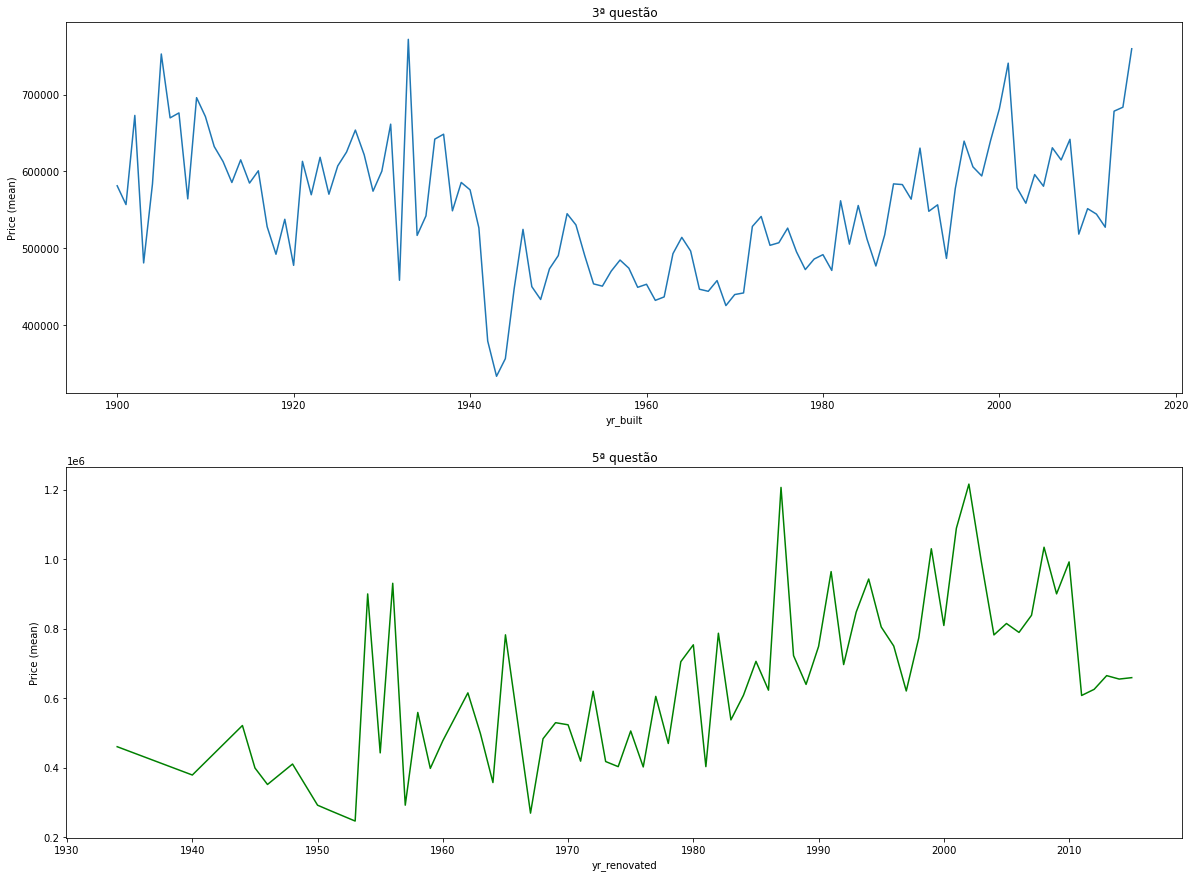

In [47]:
# 9. Crie um Dashboard com os gráficos das questões 03 e 05 (2 linhas)
from matplotlib import gridspec

fig = plt.figure( figsize=(20, 15) )
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, :], title='3ª questão', ylabel = 'Price (mean)', xlabel='yr_built')
ax2 = fig.add_subplot( specs[1, 0], title='5ª questão', ylabel = 'Price (mean)', xlabel='yr_renovated')


# Graph 1
by_price_year = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot( by_price_year['yr_built'], by_price_year['price'])


# Graph 3
from_1930 = data.loc[data['yr_renovated'] >= 1930]
from_1930 = from_1930[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot( from_1930['yr_renovated'], from_1930['price'], color = 'green')


In [69]:
#10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 
import plotly.express as px

houses = data[['id', 'lat', 'long', 'price', 'sqft_living']]

fig = px.scatter_mapbox( houses,
                       lat = 'lat',
                       lon = 'long',
                       color = 'price',
                       size = 'sqft_living',
                       color_continuous_scale=px.colors.sequential.Cividis,
                       size_max=15,
                       zoom=10)

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0} )
fig.show()